### Importing Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv(r"diabetes.csv")

### Getting the basic description of the dataset

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observation: 
* All the variables are either float or interger.
* The size of the dataset is 768x9.

### Checking for missing values

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Observation: 
* We can see that there is no missing values in the dataset.

### Checking the number of unique values present in variables.

In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Graphical Exploration

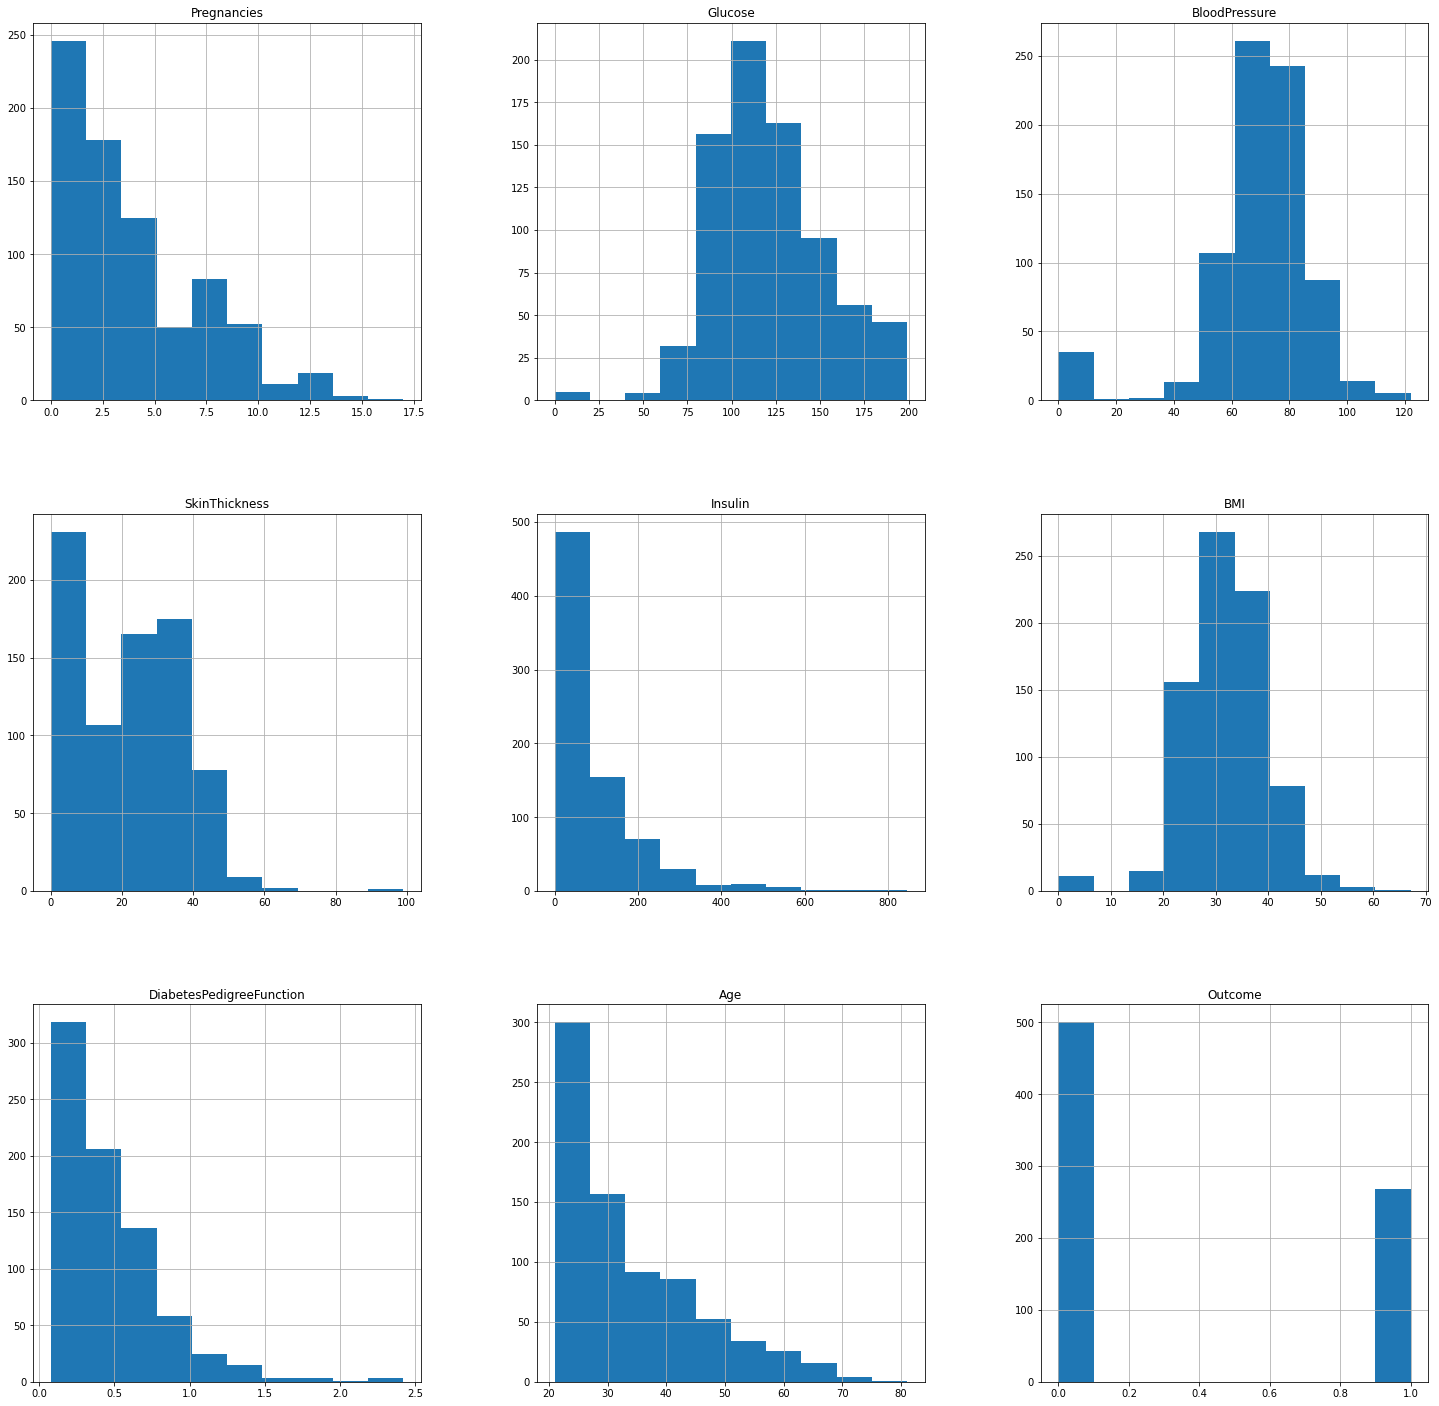

In [9]:
data.hist(figsize=(25,25))
plt.show()

<AxesSubplot:xlabel='Age'>

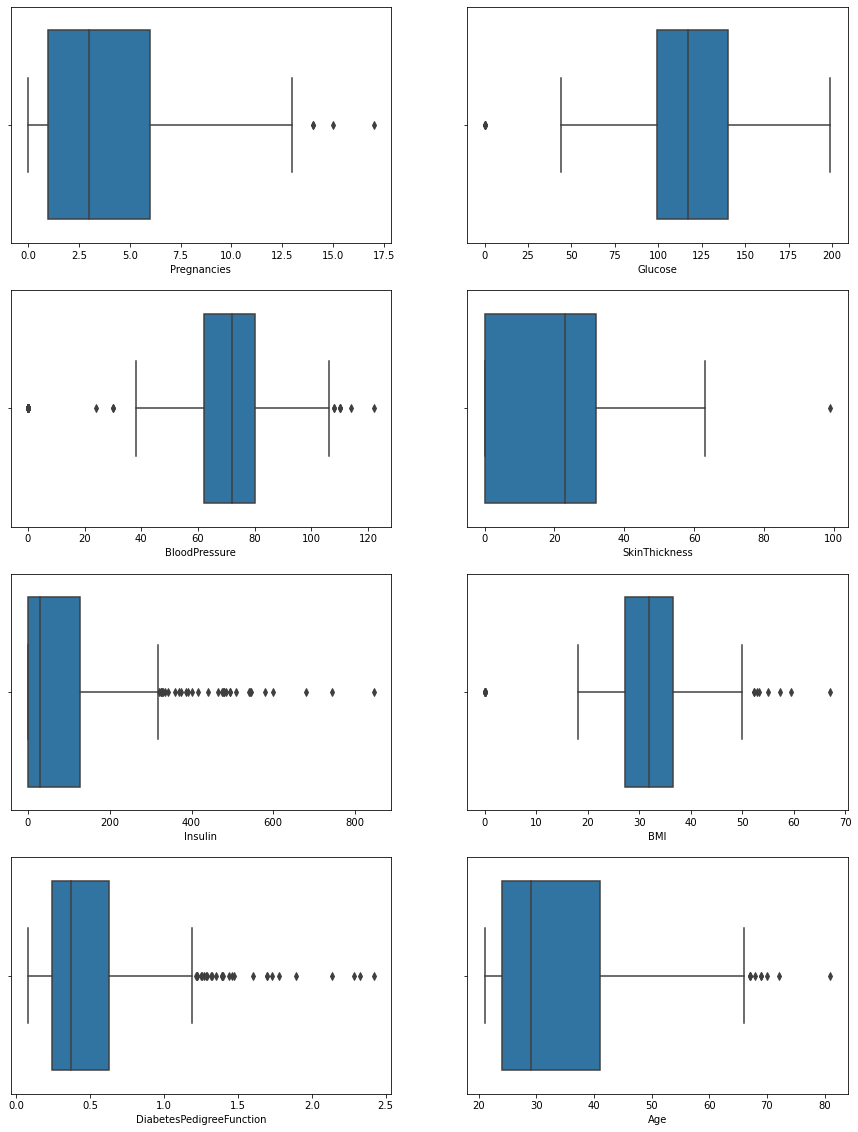

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))

sns.boxplot(ax = axs[0, 0], x = "Pregnancies", data = data)
sns.boxplot(ax = axs[0, 1], x = "Glucose", data = data)
sns.boxplot(ax = axs[1, 0], x = "BloodPressure", data = data)
sns.boxplot(ax = axs[1, 1], x = "SkinThickness", data = data)
sns.boxplot(ax = axs[2, 0], x = "Insulin", data = data)
sns.boxplot(ax = axs[2, 1], x = "BMI", data = data)
sns.boxplot(ax = axs[3, 0], x = "DiabetesPedigreeFunction", data = data)
sns.boxplot(ax = axs[3, 1], x = "Age", data = data)

#### Observation: 
* From the histograms, we can observe that many variables are highly right skewwed such as age, insulin.
* From the box plots, we can see that all the variables contain some outliers.

### Imputing 0 in variables with their median.

In [11]:
for col in data.columns[:7]:
    data[col].replace(0, data[col].astype(float).median(axis = 0),inplace=True)

In [12]:
for col in data.columns[:7]:
    print(col, (data[col] == 0).sum())

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0


In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


#### Observation: 
* We had to replace the zeros with the medians as in reality its not possible for any of the variables mentioned above to have a value of zero.
* We choose to replace with median as the data is skewwed.

### Correlation between variables

<AxesSubplot:>

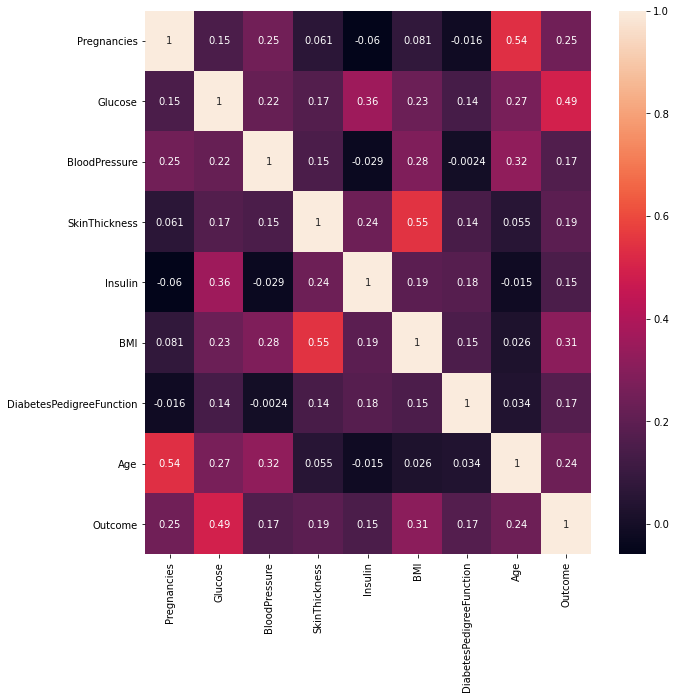

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

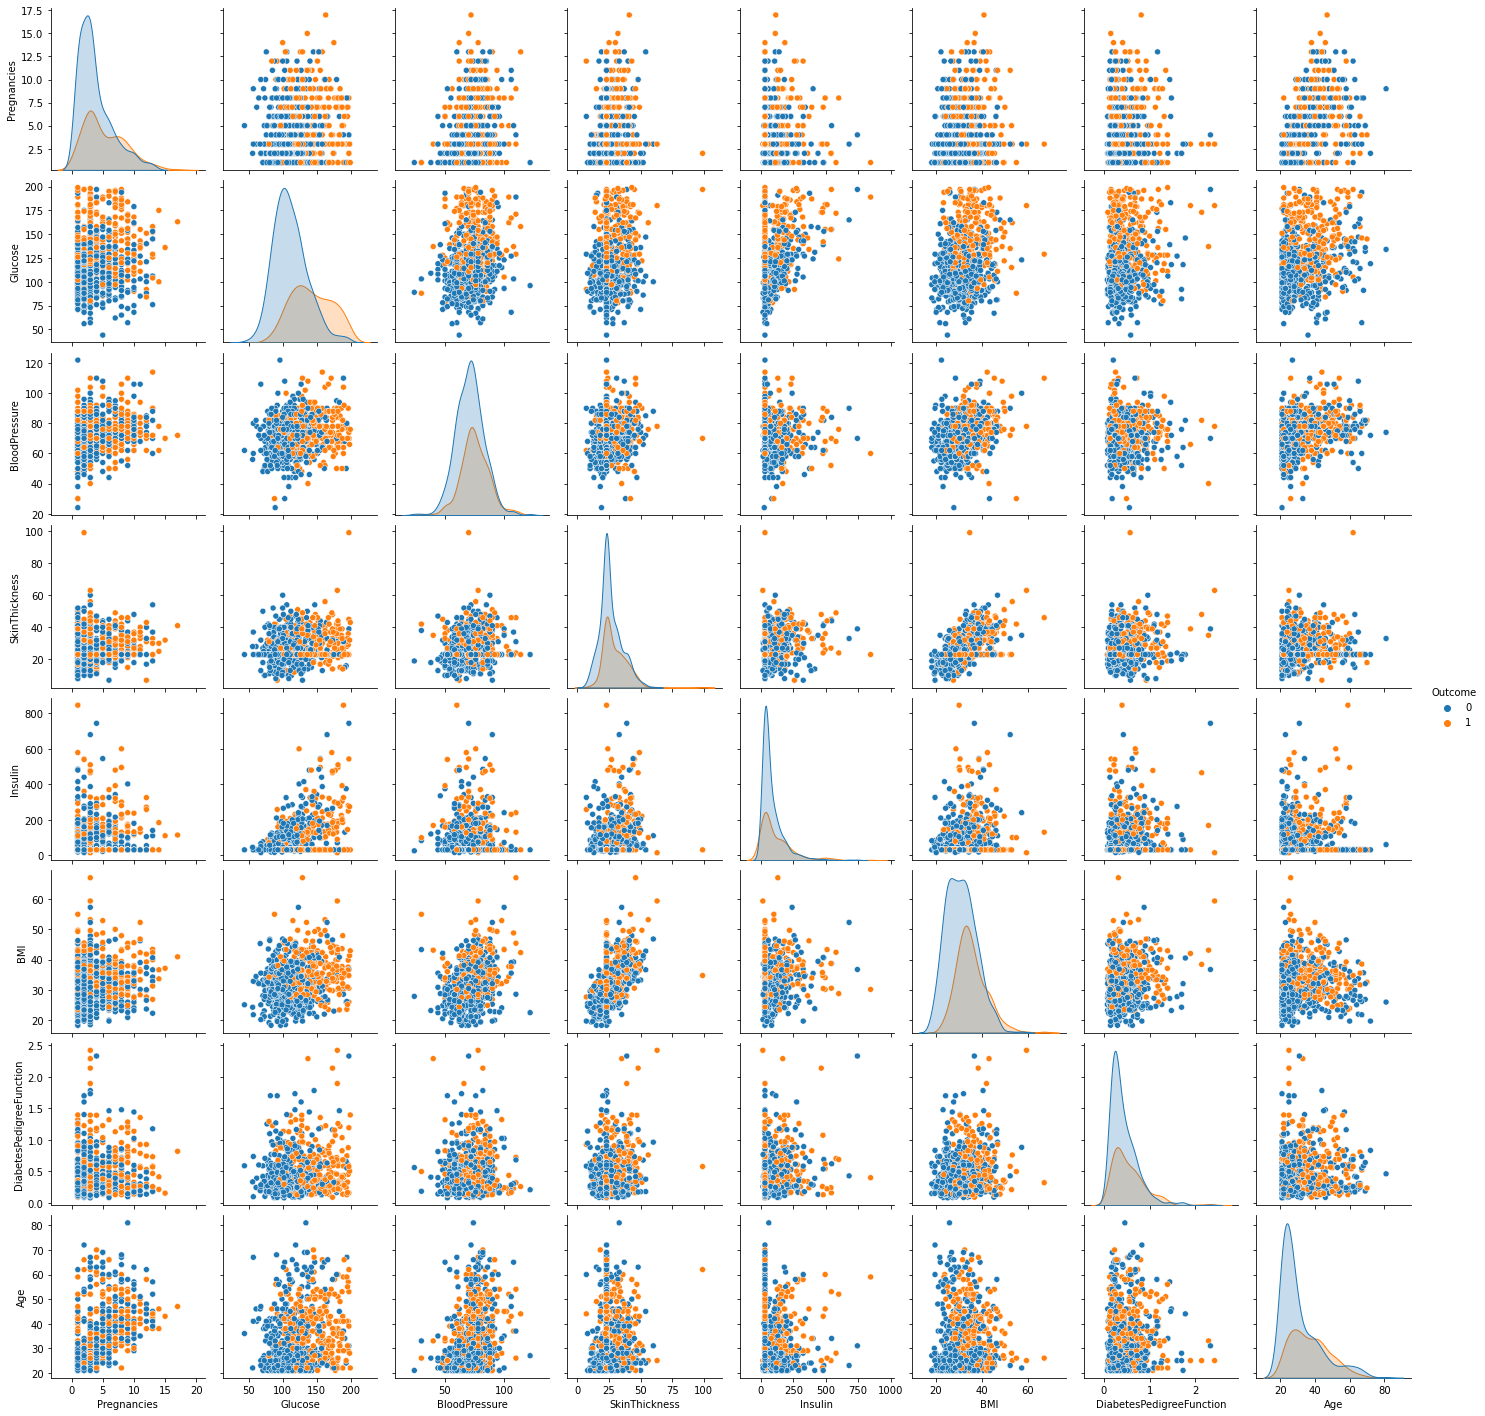

In [15]:
sns.pairplot(data, hue="Outcome")

#### Observation: 
* From the heatmap, we see that outcome (if a person has diabetes or not) has a moderate correlation with glucose.
* There is also correlation between age and pregnancies, skinthickness and insulin.

### Getting the total no. of each outcome

In [16]:
# 0: no diabetes 1: yes diabetes
data["Outcome"].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

#### Observation: 
* 500 are not diabetic whereas 268 are diabetic.
* The classification is not balanced.

### Getting the target variable (Outcome)

In [17]:
x = data.drop("Outcome", axis = 1)
y = data["Outcome"]

### Data Transformation and Train-test split

In [18]:
#importing all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
#scaling the data
scale = StandardScaler()
scaledX = scale.fit_transform(x)

In [20]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 42)

In [21]:
#getting the number of observations in test set
y_test.shape

(154,)

In [22]:
#total number of observation in test set for each outcome
y_test.value_counts()

0    99
1    55
Name: Outcome, dtype: int64

In [23]:
#total number of observation in train set for each outcome
y_train.value_counts()

0    401
1    213
Name: Outcome, dtype: int64

### LOGISTIC REGRESSION

In [24]:
#builiding the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [25]:
#predicting the test set values
y_pred = LR.predict(x_test)

##### Training set report

In [26]:
confusion_matrix(y_train, LR.predict(x_train))

array([[356,  45],
       [ 94, 119]], dtype=int64)

In [27]:
print(classification_report(y_train, LR.predict(x_train)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       401
           1       0.73      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.77       614



In [28]:
print("Accuracy:",accuracy_score(y_train, LR.predict(x_train)))

Accuracy: 0.7736156351791531


##### Test set report

In [29]:
confusion_matrix(y_test, y_pred)

array([[82, 17],
       [19, 36]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


#### Observation: 
* In the Train set report, 356 observations were correctly classified as 0(non-diabetic) and 119 observations were correctly classified as 1(diabetic).
* In the train set report, 82 observations were correctly classified as 0(non-diabetic) and 36 observations were correctly classified as 1(diabetic).
* The accuracy of training set is 0.7736 and of test set is 0.7662. 
* The difference between accuracy for train and test set is very low, so we can assume that the model isn't overfitted.

### K NEAREST NEIGHBOUR

In [32]:
#building model with k = 3 i.e 3 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#predicting the test set values.
y_pred = knn.predict(x_test)

##### Train set report

In [34]:
confusion_matrix(y_train, knn.predict(x_train))

array([[360,  41],
       [ 58, 155]], dtype=int64)

In [35]:
print(classification_report(y_train, knn.predict(x_train)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       401
           1       0.79      0.73      0.76       213

    accuracy                           0.84       614
   macro avg       0.83      0.81      0.82       614
weighted avg       0.84      0.84      0.84       614



In [36]:
print("Accuracy:",accuracy_score(y_train, knn.predict(x_train)))

Accuracy: 0.8387622149837134


##### Test set report

In [37]:
confusion_matrix(y_test, y_pred)

array([[73, 26],
       [24, 31]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74        99
           1       0.54      0.56      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


#### Observation: 
* In the Train set report, 360 observations were correctly classified as 0(non-diabetic) and 155 observations were correctly classified as 1(diabetic).
* In the train set report, 73 observations were correctly classified as 0(non-diabetic) and 31 observations were correctly classified as 1(diabetic).
* The accuracy of training set is 0.838 and of test set is 0.675. 
* The difference between accuracy for train and test set is bit high.

In [40]:
#building model with k = 5 i.e 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test)

##### Train test report

In [42]:
confusion_matrix(y_train, knn.predict(x_train))

array([[360,  41],
       [ 66, 147]], dtype=int64)

In [43]:
print(classification_report(y_train, knn.predict(x_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       401
           1       0.78      0.69      0.73       213

    accuracy                           0.83       614
   macro avg       0.81      0.79      0.80       614
weighted avg       0.82      0.83      0.82       614



In [44]:
print("Accuracy:",accuracy_score(y_train, knn.predict(x_train)))

Accuracy: 0.8257328990228013


##### Test set report

In [45]:
confusion_matrix(y_test, y_pred)

array([[73, 26],
       [20, 35]], dtype=int64)

In [46]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.57      0.64      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.70       154



In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


#### Observation: 
* In the Train set report, 360 observations were correctly classified as 0(non-diabetic) and 147 observations were correctly classified as 1(diabetic).
* In the train set report, 73 observations were correctly classified as 0(non-diabetic) and 35 observations were correctly classified as 1(diabetic).
* The accuracy of training set is 0.825 and of test set is 0.701. 
* The difference between accuracy for train and test set is good, neither too high nor too low.

### Conclusion: 
* Observing the accuracy for the test set for the three built models, logistic regression gave the best accuracy followed by the knn model with 5 neighbours and last the knn model with 3 neighbours.